In [1]:
#initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
#view and clean data
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [18]:
#drop NAs
whale_returns = whale_returns.dropna().copy()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [8]:
#double check and count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [14]:
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [13]:
#double check and count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [15]:
#drop NAs
algo_returns = algo_returns.dropna().copy()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [16]:
#double check and count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [20]:
#check data types
sp500_history.dtypes

Close    object
dtype: object

In [21]:
#change data type from object to float
sp500_history['Close'] = sp500_history['Close'].str.replace("$","")
sp500_history['Close'] = sp500_history['Close'].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [22]:
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [23]:
#calculate daily returns
sp500_history = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [24]:
#double check and count nulls
sp500_history.isnull().sum()

Close    1
dtype: int64

In [25]:
#drop nulls
sp500_history = sp500_history.dropna().copy()
sp500_history.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [26]:
#double check and count nulls
sp500_history.isnull().sum()

Close    0
dtype: int64

In [28]:
#rename 'Close' column to 'S&P 500'
sp500_history = sp500_history.rename(columns = {'Close':'S&P 500'})
sp500_history.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [29]:
#combine whale_returns, algo_returns, and sp500_history into a single dataframe
returns_df = pd.concat([whale_returns,algo_returns,sp500_history], axis='columns', join='inner')
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


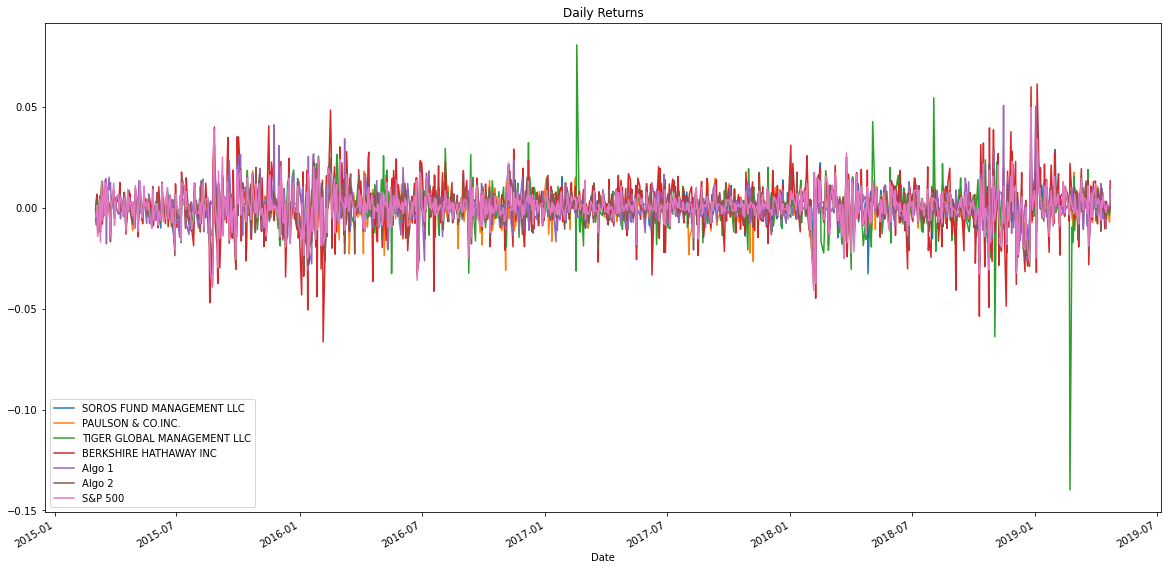

In [53]:
#plot daily returns
returns_df.plot(figsize = (20,10), title='Daily Returns');

In [ ]:
##It looks like Algo 2 and Soros perform similarly to S&P 500 but hard to tell with this chart

In [45]:
#plot the cumulative returns
cumulative_returns = (1 + returns_df).cumprod


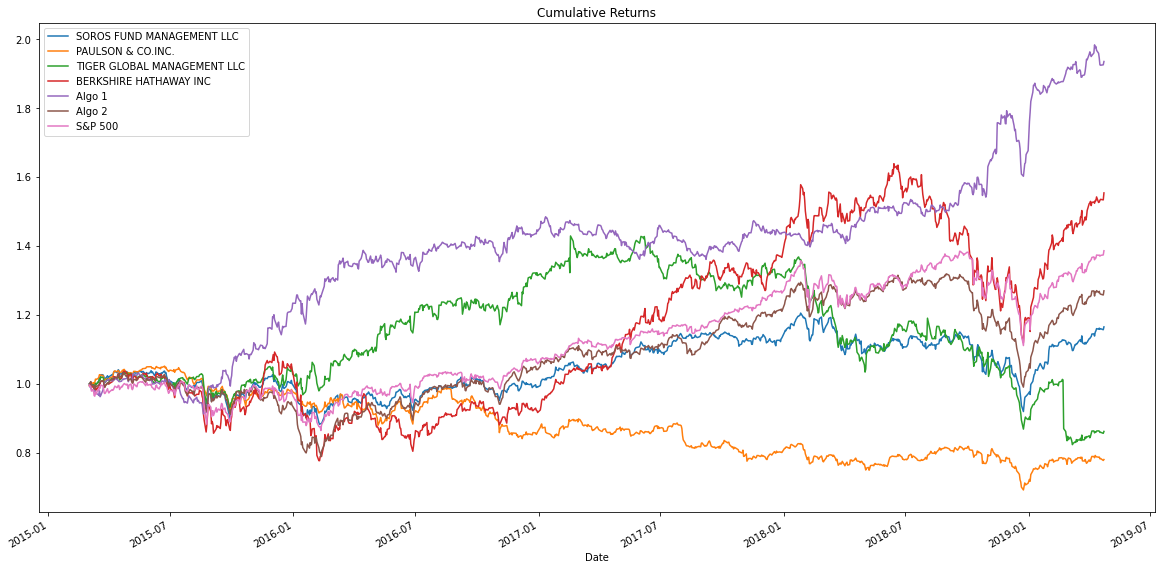

In [44]:
cumulative_returns().plot(figsize=(20,10), title='Cumulative Returns');

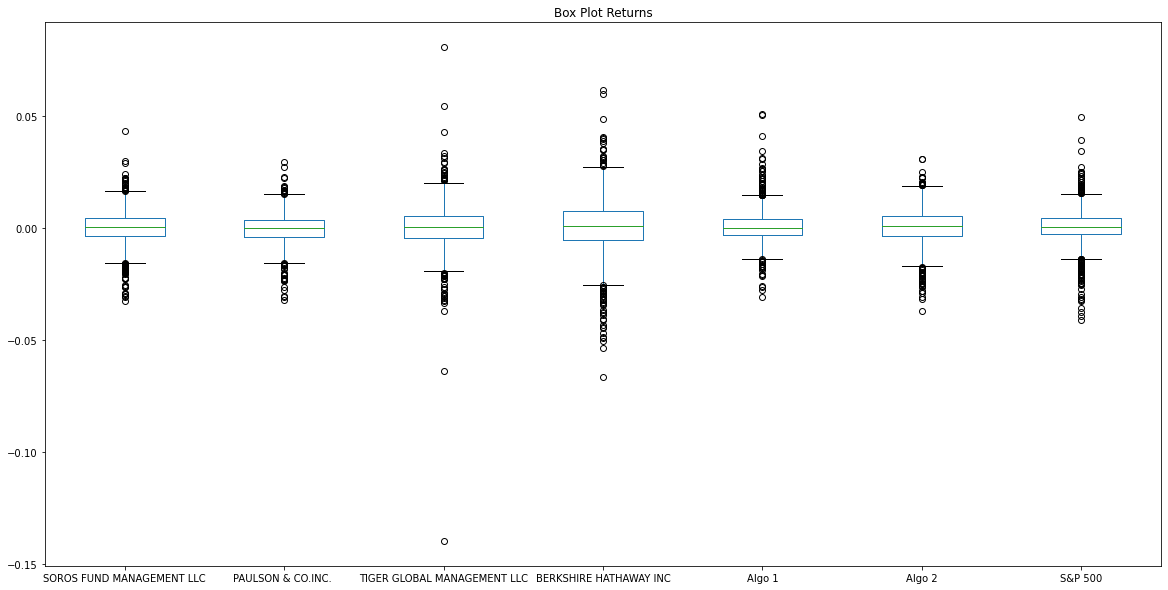

In [46]:
#Risk
#create a box plot of each portfolio
returns_df.plot.box(figsize = (20,10), title = 'Box Plot Returns');

In [47]:
#calclulate the standard deviation of all the portfolious
returns_df.std().sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [49]:
#Determine which portfolios are riskier than the S&P 500
sp500_risk = returns_df['S&P 500'].std()
returns_df.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [50]:
#Calculate the Annualized Standard Deviation
annual_std = returns_df.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

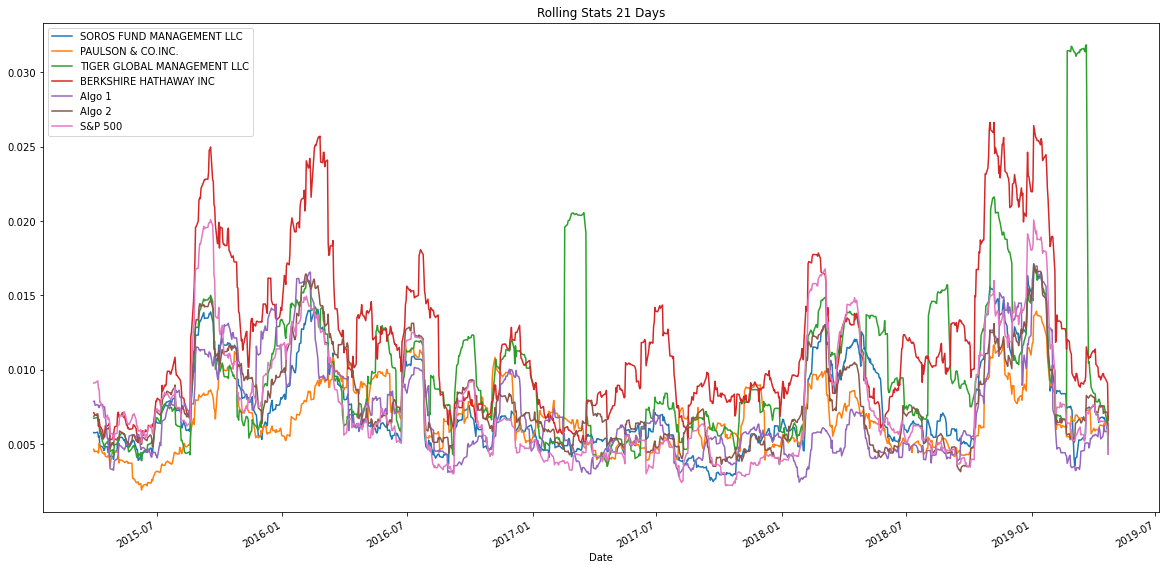

In [127]:
#rolling statistics
#Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 
#(consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
returns_df_roll_std = returns_df.rolling(window=21).std()
returns_df_roll_std.plot(figsize=(20,10),title='Rolling Stats 21 Days');

In [52]:
#Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
correlation_df = returns_df.corr()
correlation_df.style.background_gradient(cmap='cividis')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [54]:
#Soros and Algo 2 Look to perform most similarly to S&P 500 with Berkshire Hathaway being the third most similar

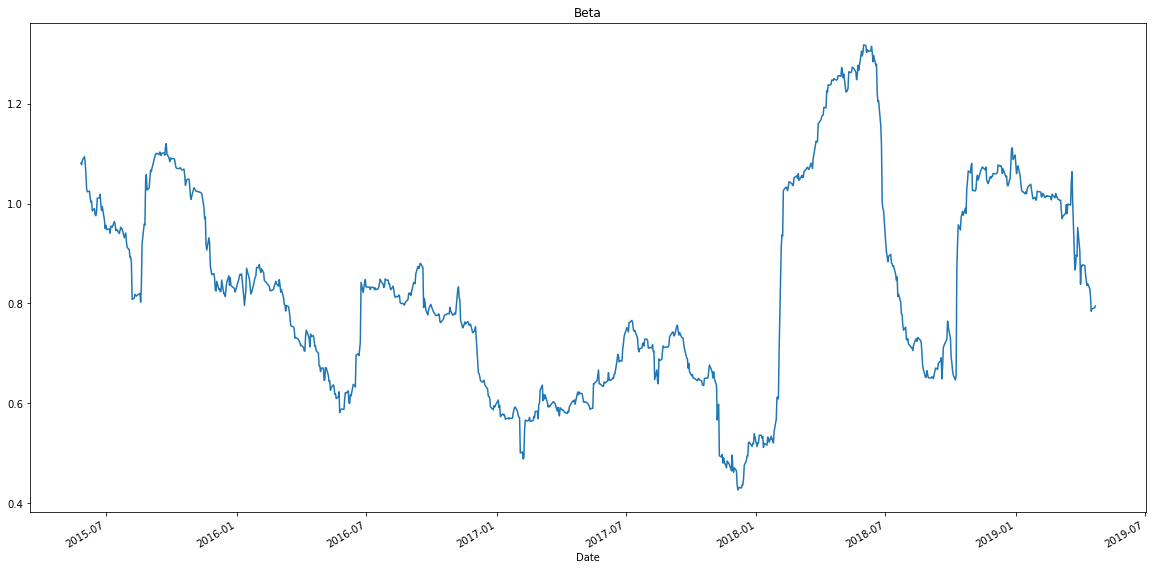

In [64]:
#Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
#to get beta must find variance and covariance
#cumulative covariance
covariance = returns_df['Algo 2'].rolling(window=60).cov(returns_df['S&P 500'])

variance = returns_df['Algo 2'].rolling(window=60).var()

beta = covariance/variance

#plotting
beta.plot(figsize=(20,10),title='Beta');


In [65]:
#because the beta graphs a postive number, Algo 2 moves in a very similar fashion to the S&P 500

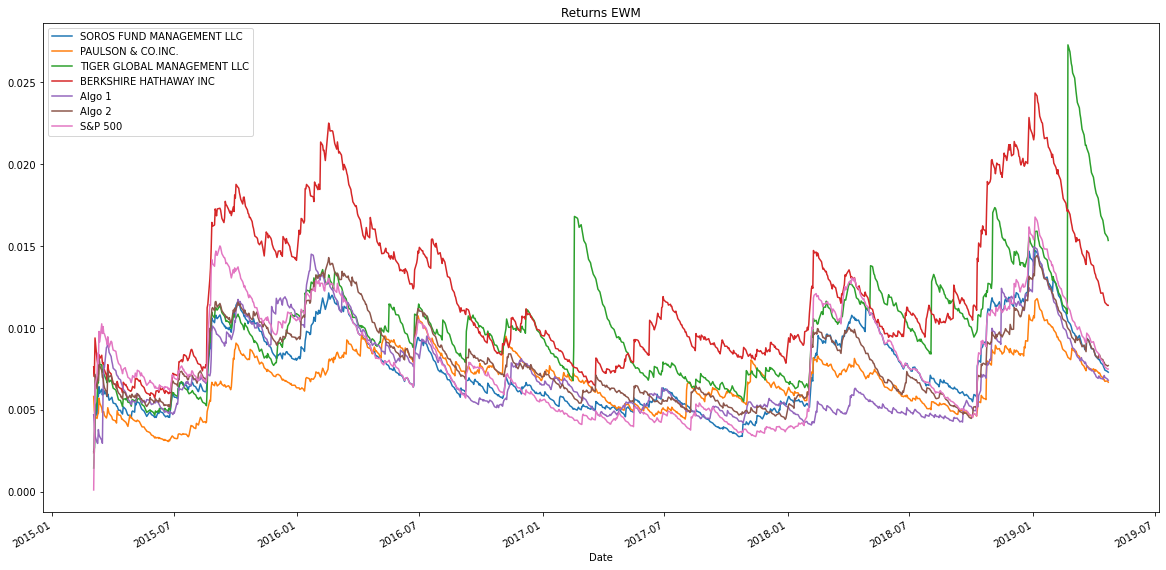

In [68]:
#calculate ewm with a 21-day half-life
returns_df.ewm(halflife=21).std().plot(figsize=(20,10),title='Returns EWM');

In [69]:
#sharpe ratios
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
#sort sharpe ratios
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

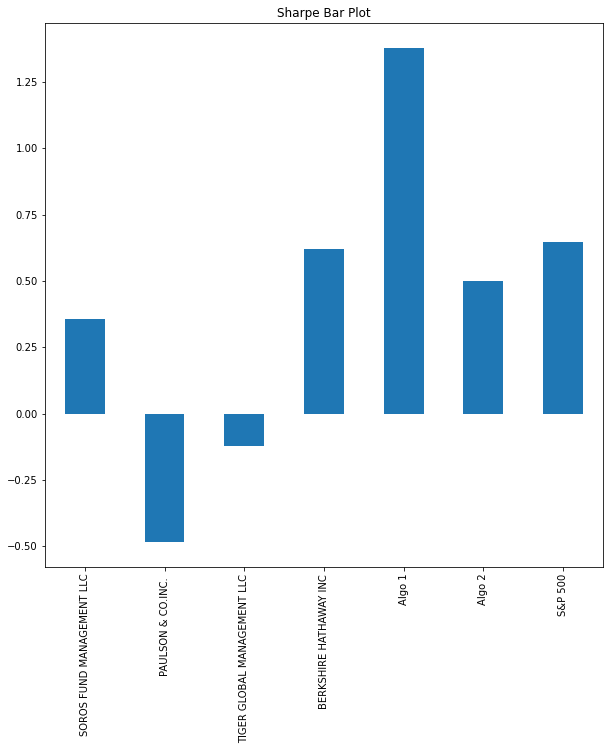

In [73]:
#plot using a bar plot
sharpe_ratios.plot.bar(figsize = (10,10), title = 'Sharpe Bar Plot');

In [74]:
#Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios
#Algo 1 outperforms the whale portfolios and S&P 500 while Algo 2 outperforms some but not all

In [98]:
aapl = pd.read_csv('aapl_historical.csv', index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl = aapl.sort_index()
aapl.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [99]:
cost = pd.read_csv('cost_historical.csv', index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost = cost.sort_index()
cost.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [100]:
goog = pd.read_csv('goog_historical.csv', index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog = goog.sort_index()
goog.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [101]:
#combine all the stocks into a single portfolio
portfolio = pd.concat([aapl['NOCP'], cost['NOCP'], goog['NOCP']], axis='columns', join='inner')
portfolio.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [104]:
#rename columns
portfolio.columns = ['AAPL', 'COST', 'GOOG']
portfolio.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [105]:
portfolio.isnull().sum()

AAPL    0
COST    0
GOOG    0
dtype: int64

In [111]:
#calculate weighted returns

weights = [1/3, 1/3, 1/3]

#calculate daily returns
portfolio_daily_return = portfolio.pct_change()
portfolio_daily_return.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [112]:
#drop NA
portfolio_daily_return = portfolio_daily_return.dropna().copy()
portfolio_daily_return.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [117]:
#calculate weighted returns
portfolio_weighted_returns = portfolio_daily_return.dot(weights)
portfolio_weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [120]:
#combine my portfolio with the other portfolios in a Data Frame that shows all the returns

all_returns_df = pd.concat([whale_returns,algo_returns,sp500_history, portfolio_weighted_returns], axis='columns', join='inner')
all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [122]:
#rename columns
all_returns_df.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'Algo 1', 'Algo 2', 'S&P 500', 'Custom']
all_returns_df.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [124]:
#rerun performance
#risk
all_returns_df.std().sort_values()

PAULSON      0.007353
Algo 1       0.008423
Algo 2       0.008791
SOROS        0.009240
S&P 500      0.009578
Custom       0.013323
TIGER        0.014648
BERKSHIRE    0.015569
dtype: float64

In [125]:
sp500_risk_2 = all_returns_df['S&P 500'].std()
all_returns_df.std() > sp500_risk_2

SOROS        False
PAULSON      False
TIGER         True
BERKSHIRE     True
Algo 1       False
Algo 2       False
S&P 500      False
Custom        True
dtype: bool

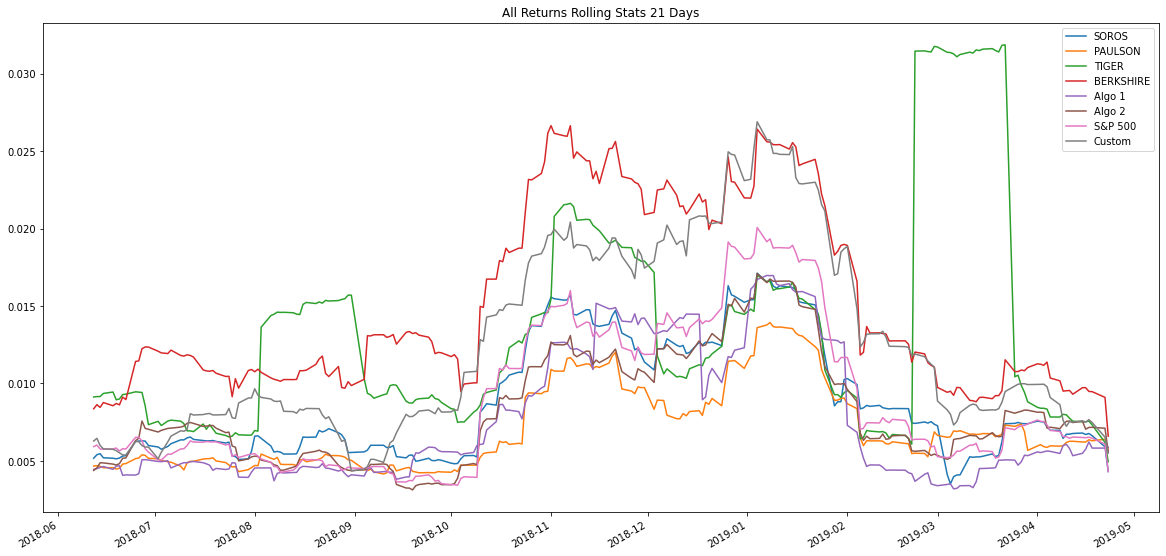

In [126]:
#rolling
all_returns_df_roll_std = all_returns_df.rolling(window=21).std()
all_returns_df_roll_std.plot(figsize=(20,10),title='All Returns Rolling Stats 21 Days');

In [129]:
#annualized sharpe ratios
a_sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
a_sharpe_ratios

SOROS        0.430713
PAULSON      0.258738
TIGER       -1.034216
BERKSHIRE    0.159756
Algo 1       2.035665
Algo 2       0.080607
S&P 500      0.584820
Custom       0.933123
dtype: float64

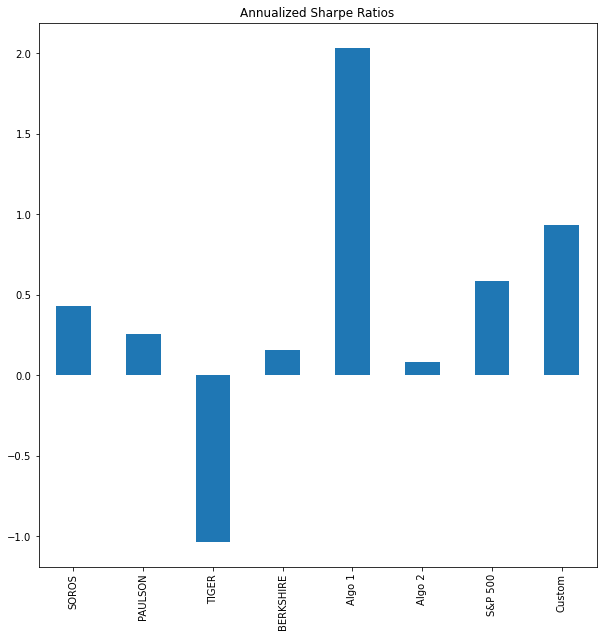

In [132]:
a_sharpe_ratios.plot.bar(figsize = (10,10), title = 'Annualized Sharpe Ratios');

In [133]:
#Correlation Analysis
a_correlation_df = all_returns_df.corr()
a_correlation_df.style.background_gradient(cmap='ocean')

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500,Custom
SOROS,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


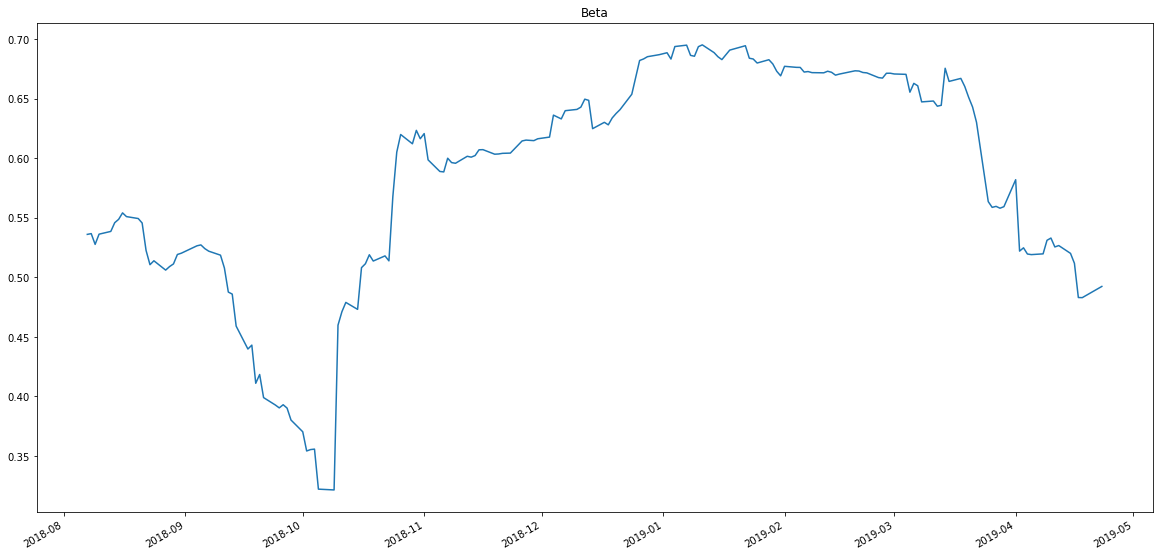

In [135]:
#beta
covariance = all_returns_df['Custom'].rolling(window=60).cov(returns_df['S&P 500'])

variance = all_returns_df['Custom'].rolling(window=60).var()

beta = covariance/variance

#plotting
beta.plot(figsize=(20,10),title='Beta');


In [ ]:
#this graph's positive movement shows that our custom portfolio has movement that is helped or dictated by the S&P 500